In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
data['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data.drop(columns=['customer_id'])

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [13]:
labelEncoder = LabelEncoder()
data['gender'] = labelEncoder.fit_transform(data['gender'])
data['country'] = labelEncoder.fit_transform(data['country'])
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [16]:
data.dtypes

customer_id           int64
credit_score          int64
country               int32
gender                int32
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [17]:
x = data.drop(columns='churn')
y = data['churn']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True,random_state=40)

In [19]:
x_train.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
1309,15690079,591,2,1,30,8,124857.69,2,0,0,50485.70
8016,15759555,569,2,1,41,2,0.00,2,1,0,134272.57
2795,15665110,515,0,0,25,7,79543.59,1,0,1,38772.82
9227,15644977,776,0,0,31,5,0.00,2,1,0,92647.94
7094,15655464,640,0,0,67,3,0.00,1,0,1,42964.63


In [20]:
x_test.count()

customer_id         3000
credit_score        3000
country             3000
gender              3000
age                 3000
tenure              3000
balance             3000
products_number     3000
credit_card         3000
active_member       3000
estimated_salary    3000
dtype: int64

In [31]:
def churn_fun(features):
    
    churn = data[data['churn']==1][features].value_counts()
    no_churn = data[data['churn']==0][features].value_counts()
    
    df = pd.DataFrame([churn,no_churn])
    df.index = ['Gone','Not Gone']
    
    df.plot(kind='bar',stacked=False,figsize=(10,5))
    plt.title("churn {}".format(features))
    plt.xlabel(features)
    plt.ylabel('Count')
    plt.show()

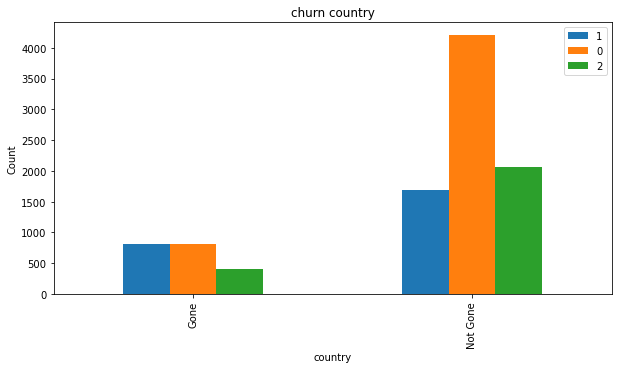

In [32]:
churn_fun('country')

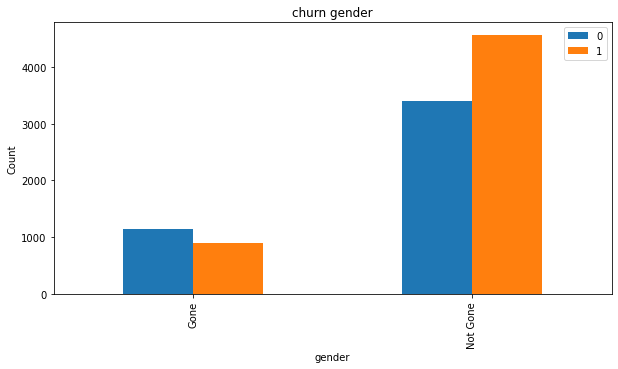

In [27]:
churn_fun('gender')

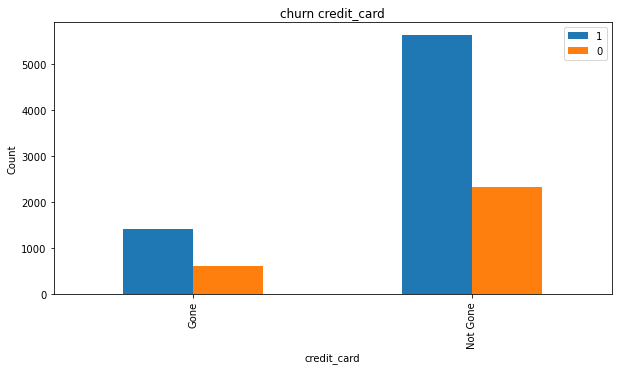

In [28]:
churn_fun('credit_card')

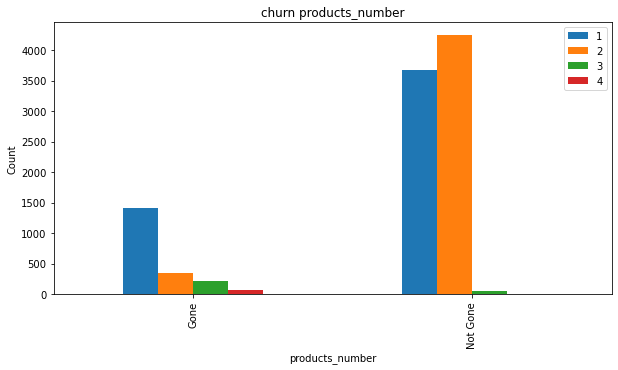

In [34]:
churn_fun('products_number')

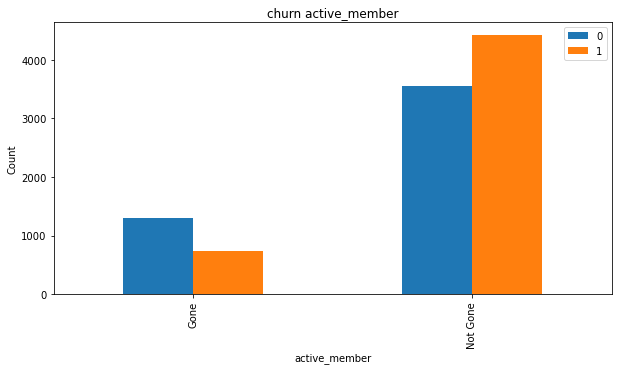

In [39]:
churn_fun('active_member')

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [41]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))
print("\nConfusion Matrix: ",confusion_matrix(y_test,y_pred))

Accuracy:  0.7573333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      2390
           1       0.20      0.07      0.10       610

    accuracy                           0.76      3000
   macro avg       0.50      0.50      0.48      3000
weighted avg       0.68      0.76      0.71      3000


Confusion Matrix:  [[2232  158]
 [ 570   40]]


In [42]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))
print("\nConfusion Matrix: ",confusion_matrix(y_test,y_pred))

Accuracy:  0.7966666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      2390
           1       0.50      0.51      0.50       610

    accuracy                           0.80      3000
   macro avg       0.69      0.69      0.69      3000
weighted avg       0.80      0.80      0.80      3000


Confusion Matrix:  [[2079  311]
 [ 299  311]]


In [43]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))
print("\nConfusion Matrix: ",confusion_matrix(y_test,y_pred))

Accuracy:  0.8566666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      2390
           1       0.74      0.45      0.56       610

    accuracy                           0.86      3000
   macro avg       0.81      0.70      0.74      3000
weighted avg       0.85      0.86      0.84      3000


Confusion Matrix:  [[2296   94]
 [ 336  274]]


In [44]:
model = SVC()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))
print("\nConfusion Matrix: ",confusion_matrix(y_test,y_pred))

Accuracy:  0.7966666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      2390
           1       0.00      0.00      0.00       610

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.80      0.71      3000


Confusion Matrix:  [[2390    0]
 [ 610    0]]
